In [1]:
import h5py
import rasterio
from rasterio.mask import mask
from rasterio.transform import from_origin
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd 
import pandas as pd
from dnb_annual import *
from variables import years, composites


In [2]:
# Load data, ukr
ukraine_polygons = gpd.read_file("geoBoundaries-UKR-ADM1.geojson")
dnb_2021_ukr = dnb_annual(2021, composites, ukraine_polygons, "ukr")
dnb_2021_ukr.load_regional_images()

dnb_2022_ukr = dnb_annual(2022, composites, ukraine_polygons, "ukr")
dnb_2022_ukr.load_regional_images()

In [3]:
# Load data, pol
poland_polygons = gpd.read_file("poland_boundaries.geojson")
poland_polygons = clean_pol_polygons(poland_polygons)
dnb_2021_pol = dnb_annual(2021, composites, poland_polygons, "pol")
dnb_2021_pol.load_regional_images()

dnb_2022_pol = dnb_annual(2022, composites, poland_polygons, "pol")
dnb_2022_pol.load_regional_images()

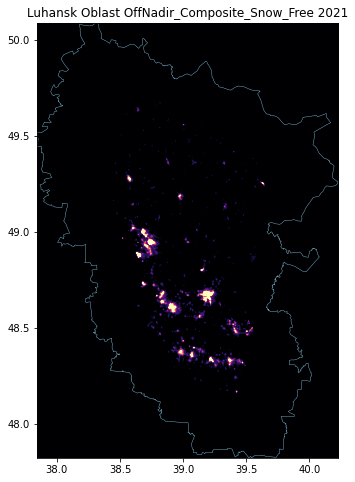

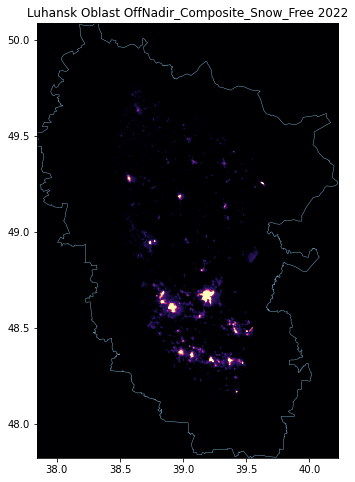

In [7]:
# compare region in 2021 and 2022
dnb_type = "AllAngle_Composite_Snow_Free"
region = "Luhansk Oblast"

dnb_2021_ukr.plot_regional_image(dnb_type, region, high_quality=True)
dnb_2022_ukr.plot_regional_image(dnb_type, region, high_quality=True)

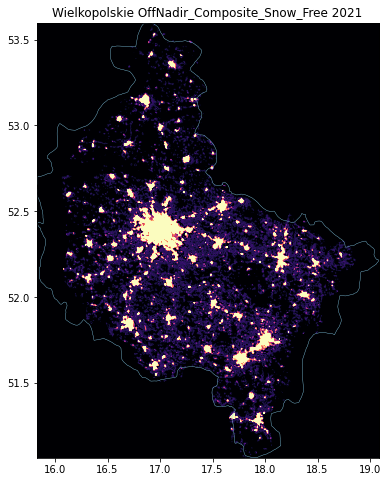

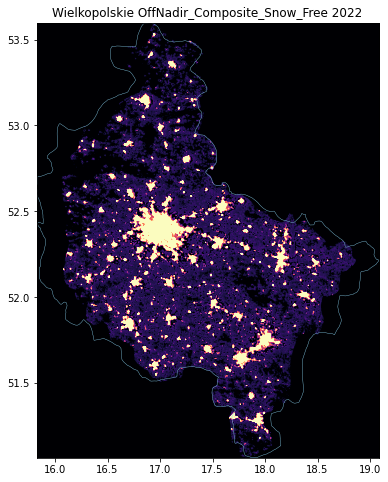

In [8]:
# compare region in 2021 and 2022
dnb_type = "OffNadir_Composite_Snow_Free"
region = "Wielkopolskie"

dnb_2021_pol.plot_regional_image(dnb_type, region, high_quality=True)
dnb_2022_pol.plot_regional_image(dnb_type, region, high_quality=True)